In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#importing libraries and dataset

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [3]:
#importing data set
df_org=pd.read_csv("/content/drive/MyDrive/capstone project/creditcard.csv")

In [4]:
#copy of original dataset
credit_card_data=df_org.copy()

In [5]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [10]:
#This Dataset is  unblanced
#0-normalize
#1-fraud

# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
print("Duplicate Rows:", credit_card_data.duplicated().sum())
credit_card_data = credit_card_data.drop_duplicates()

Duplicate Rows: 1081


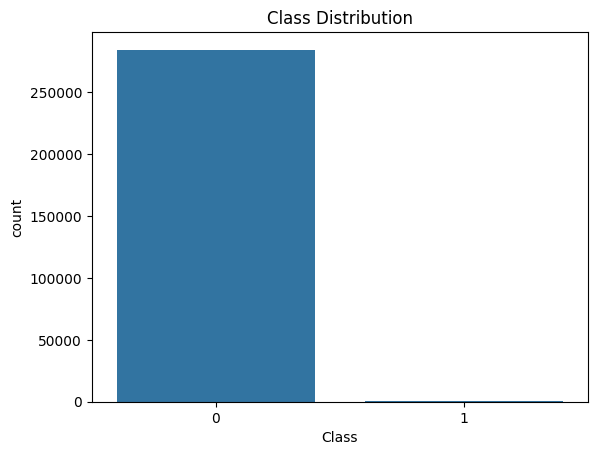

In [13]:
sns.countplot(x='Class', data=credit_card_data)
plt.title("Class Distribution")
plt.xlabel()
plt.show()

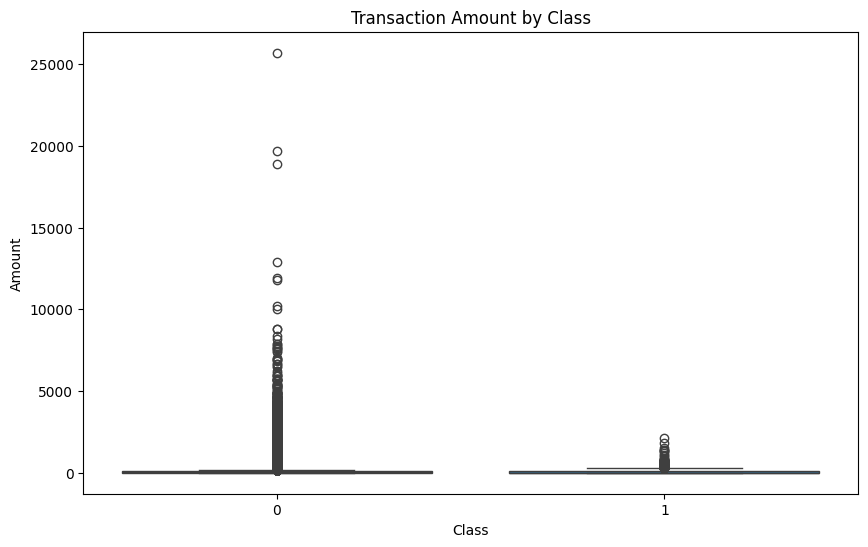

In [ ]:
# Boxplot for Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=credit_card_data)
plt.title("Transaction Amount by Class")
plt.show()

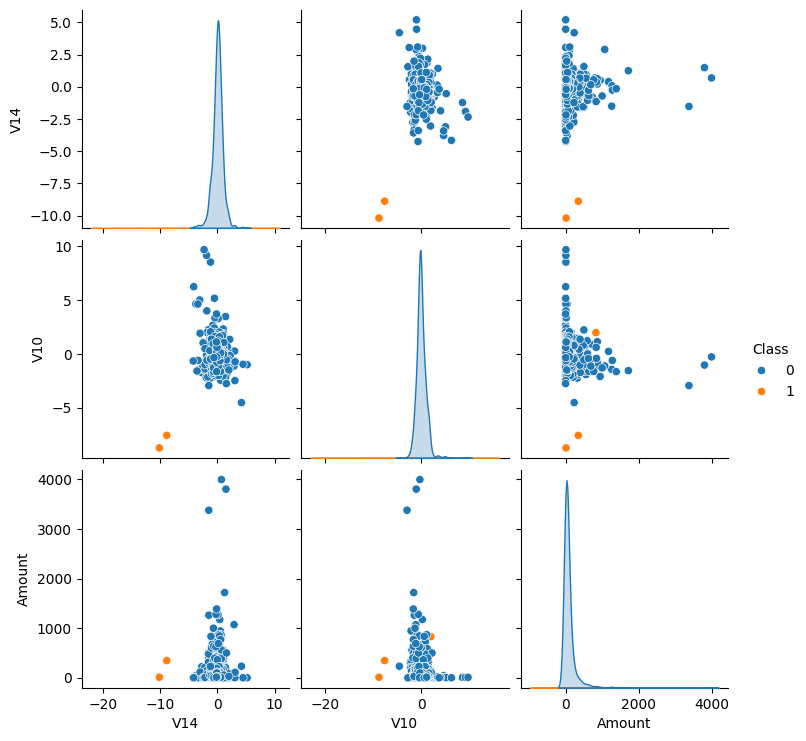

In [23]:
sns.pairplot(credit_card_data.sample(1000), vars=['V14', 'V10', 'Amount'], hue='Class')
plt.show()


In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
#Building a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

In [28]:
legit_sample = legit.sample(n=492)

In [29]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [30]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102951,68438.0,0.793839,-1.427613,0.076086,-1.890894,-1.121944,-0.487660,-0.157521,-0.214768,2.241670,...,0.283569,0.586880,-0.534381,-0.339923,0.745124,-0.623861,0.061862,0.076225,288.81,0
242523,151529.0,1.898481,-0.182592,-0.864246,0.657048,-0.385110,-0.765940,-0.336948,-0.179576,1.138018,...,0.245545,0.921306,-0.021314,-0.143135,0.014916,-0.141104,0.051229,-0.002078,54.99,0
107874,70658.0,-1.212565,1.334703,1.395423,0.113321,-0.137475,-0.600346,0.595851,-0.005240,-0.099972,...,-0.140409,-0.133090,-0.122433,0.451842,0.003817,0.172193,-0.349888,-0.122766,7.06,0
138785,82841.0,-1.593213,1.457407,1.384460,-1.355564,-0.587260,-0.990170,0.349398,0.306059,0.516464,...,-0.120688,-0.038225,0.062866,0.623718,-0.342900,0.703666,0.302016,0.070739,0.77,0
130450,79356.0,1.246054,-0.423741,0.889221,-0.714881,-1.302996,-0.850099,-0.642985,0.025690,1.978546,...,-0.024249,0.129365,-0.023154,0.381101,0.465010,-0.683124,0.086862,0.033070,1.00,0


In [31]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [32]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94145.461382,0.015185,-0.062044,0.086525,-0.049440,0.052421,0.068701,0.042207,0.030793,0.014272,...,0.018610,-0.020031,0.014439,0.026187,0.009548,0.025938,-0.015998,0.027186,0.012849,87.120833
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [33]:
#Splitting the data into Features & Targets
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
186083  126946.0 -2.988047 -0.493352  0.847016 -0.235752  1.278883  1.294572   
105977   69767.0  1.076925  0.028522  0.469944  1.348468 -0.307769  0.006279   
271664  164681.0  1.980039 -0.446615 -0.221187  0.482294 -0.790438 -0.477929   
2799      2357.0  1.273223  0.112394  0.168771  0.319982 -0.097302 -0.215178   
219834  141904.0 -0.702583  1.164869 -1.617362 -1.283162  2.955699  3.317593   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

186083    0
105977    0
271664    0
2799      0
219834    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [51]:
#Split the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [52]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

In [36]:
model = LogisticRegression()

In [53]:
#training the Logistic Regression Model with Training Data
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

Model Evaluation

In [56]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = classification_report(X_train_prediction, Y_train)

In [59]:
print('Classification report on Training data :\n ', training_data_accuracy)

Classification report on Training data :
                precision    recall  f1-score   support

           0       0.97      0.93      0.95       413
           1       0.92      0.97      0.95       374

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



In [61]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = classification_report(X_test_prediction, Y_test)

In [62]:
print('Classification report on Test Data : \n', test_data_accuracy)

Classification report on Test Data : 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       107
           1       0.89      0.97      0.93        90

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [70]:
# Save the model
joblib.dump(model, 'fraud_baseline_model.pkl')

['fraud_baseline_model.pkl']

In [64]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [65]:
X = new_dataset.drop('Class', axis=1)
y = new_dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [66]:
rf = RandomForestClassifier(random_state=42)

search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1',  # or 'roc_auc'
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)
best_model = search.best_estimator_


In [46]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97        99
           1       0.99      0.95      0.97        98

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



In [69]:
joblib.dump(best_model, 'fraud_tuned_model.pkl')

['fraud_tuned_model.pkl']